<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [3]:
%matplotlib inline
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


# run isochrones in star module

## stellar characterization

In [5]:
toiid = 179
s = cr.Star(toiid=toiid)

Target: TOI 179
Searching Vizier: (44.262 -56.1919) with radius=3.0 arcsec


## isochrones fitting

In [6]:
s.query_specs_from_tfop()

Saved: /home/jp/github/research/project/chronos/chronos/../data/tfop_sg2_spec_table.csv
There are 11 spectra in https://exofop.ipac.caltech.edu/tess/target.php?id=207141131



,TIC ID,TIC,TOI,Telescope,Instrument,Spectral resolution,Wavelength coverage,SNR/resolution,SNR wavelength,Appropriate to PRV,Obs date,User,Group,Tag,Notes
1672,207141131,NaN,NaN,SMARTS (1.5 m),CHIRON,80000.0,4500 to 8900 Angstroms,66.30,5500 angstroms,N,2019-02-18,quinn,tfopwg,2871,NaN
1673,207141131,NaN,NaN,SMARTS (1.5 m),CHIRON,80000.0,4500 to 8900 Angstroms,53.20,5500 angstroms,N,2019-08-13,quinn,tfopwg,5197,NaN
1674,207141131,NaN,NaN,LCO (1 m),NRES,53000.0,380 to 860 nm,45.06,550 nm,N,2018-12-19 21:51:20,rabus,NaN,6571,NRES
1675,207141131,NaN,NaN,LCO (1 m),NRES,53000.0,380 to 860 nm,83.69,550 nm,N,2018-11-04 03:54:09,rabus,tfopwg,7575,NRES
1676,207141131,NaN,NaN,LCO (1 m),NRES,53000.0,380 to 860 nm,69.13,550 nm,N,2018-11-05 00:08:27,rabus,tfopwg,7576,NRES
1677,207141131,NaN,NaN,LCO (1 m),NRES,53000.0,380 to 860 nm,63.83,550 nm,N,2018-11-06 02:07:34,rabus,tfopwg,7581,NRES
1678,207141131,NaN,NaN,LCO (1 m),NRES,53000.0,380 to 860 nm,52.31,550 nm,N,2018-11-07 04:41:30,rabus,tfopwg,7583,NRES
1679,207141131,NaN,NaN,LCO (1 m),NRES,53000.0,380 to 860 nm,101.91,550 nm,N,2018-11-15 07:07:10,rabus,tfopwg,7592,NRES
1680,207141131,NaN,NaN,SMARTS (1.5 m),CHIRON,80000.0,4500 to 8900 Angstroms,114.60,5150 Angstroms,N,2020-02-02 00-52-17,zhou,tfopwg,18541,NaN
1681,207141131,NaN,NaN,SMARTS (1.5 m),CHIRON,80000.0,4500 to 8900 Angstroms,116.00,5150 Angstroms,N,2020-02-05 00-27-03,zhou,tfopwg,18544,NaN


In [7]:
import numpy as np

cols = "Teff logg __Fe_H_ Rad Mass vsini".split()
params={}
for col in cols:
    pars = s.query_vizier_param(col)
    mean = np.nanmean(list(pars.values()))
    err = np.nanstd(list(pars.values()))
    
    params[col] = (mean,err)
    print(f"{col}: {mean:.2f}, {err:.2f}")

Found 15 references with Teff
Teff: 5098.08, 126.84
Found 3 references with logg
logg: 4.59, 0.10
Found 4 references with __Fe_H_
__Fe_H_: -0.01, 0.00
Found 4 references with Rad
Rad: 0.78, 0.02
Found 4 references with Mass
Mass: 0.84, 0.01
Found 2 references with vsini
vsini: 4.30, 0.00


In [8]:
s.starhorse_Teff, s.starhorse_logg, s.starhorse_met

(5332.04, 4.564691, -0.137198)

In [9]:
iso_params = s.get_iso_params(teff=(5100,150),
                 logg=(4,5,0.1),
                 feh=(-0.11,0.1),
                 bands="J H K".split()
                )

Querying Gaia DR2 catalog for ra,dec=(44.262 -56.1919) within 3.0 arcsec.
Querying TIC catalog for ra,dec=(44.262 -56.1919) within 3.0 arcsec.
Gaia and TIC catalog cross-match succeeded.


In [10]:
iso_model = s.init_isochrones(iso_params=iso_params)
iso_model

{'Teff': [5100.0, 150.0], 'feh': [-0.11, 0.1], 'logg': [4.0, 5.0], 'parallax': [25.901097647182596, 0.10293960586359334], 'J': [7.428, 0.018], 'H': [7.029, 0.015], 'K': [6.883, 0.02]}


In [11]:
s.iso_params_init

{'EEP': 329.58,
 'log10(Age [yr])': 9.5596,
 '[Fe/H]': -0.0478,
 'ln(Distance)': 5.560681631015528,
 'Av': 0.0045}

In [12]:
iso_model.lnprior(s.iso_params0), iso_model.lnlike(s.iso_params0), iso_model.lnpost(s.iso_params0)

(-14.510012104047181, -1212430.4645540293, -1212444.9745661332)

In [26]:
#set prior
#default: mass=[0.1,10] Msol and eep=[0,808] or  tip of the red giant branch (RGBTip)

# uncomment to change
# mod.set_bounds(eep=(0, 605))
# mod._priors["eep"].bounds

(0, 605)

In [13]:
#set specific prior
from isochrones.priors import FlatLogPrior, FlatPrior 
import numpy as np

#age = [10, 5e3] Myr
iso_model._priors["age"] = FlatPrior(bounds=[6, np.log10(5e9)])
# mod.set_bounds(age=(6, np.log10(5e9)))
iso_model._priors["age"].bounds

[6, 9.698970004336019]

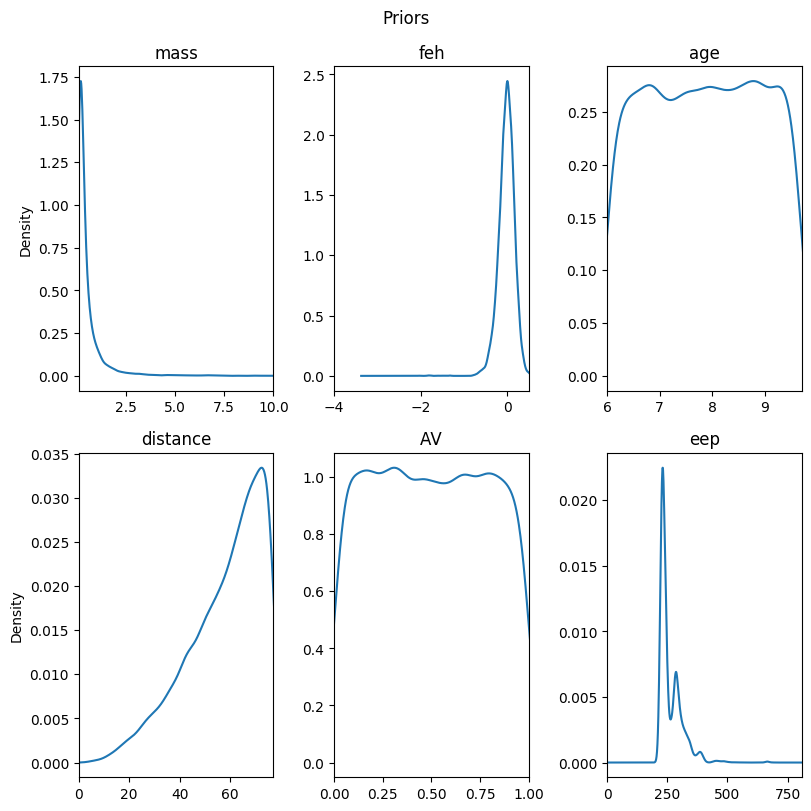

In [14]:
fig = s.plot_isochrones_priors()

In [15]:
#double check input parameters
s.isochrones_model.observed_quantities

['J_mag', 'H_mag', 'K_mag', 'Teff', 'feh', 'logg', 'parallax']

In [24]:
s.target_coord.distance

<Distance 38.60840238 pc>

In [27]:
#run isochrone single star model
iso_model = s.run_isochrones(iso_params=iso_params, 
                       overwrite=False,
                       n_live_points=1000 #multinest parameter
                      )

Using previously initialized model.
Loading previous samples. Otherwise, try overwrite=True.
method: Nested Sampling
Done.


In [31]:
iso_model.param_names

('eep', 'age', 'feh', 'distance', 'AV')

In [28]:
iso_model.map_pars

array([ 2.01472425e+02,  7.70069088e+00, -8.72727155e-02,  3.86590251e+01,
        2.71707803e-01])

In [29]:
iso_model.lnpost(iso_model.map_pars)

-58.09836336988235

In [30]:
#model evidence
iso_model.evidence

  analysing data from ./chains/TOI 179-mist-single-.txt


(-79.40813035237709, 0.1222939812426866)

In [ ]:
# !conda install bokeh -y

In [ ]:
# import pandas as pd
# import holoviews as hv
# import hvplot.pandas
# # hv.extension('bokeh')

# def plot_samples(samples):
#     df = pd.DataFrame(samples, columns=['eep', 'age', 'feh', 'distance', 'AV'])
#     df['mass'] = mod.ic.interp_value([df.eep, df.age, df.feh], ['mass'])
#     return hv.Layout([df.hvplot.hist(c).options(width=300) for c in df.columns]).cols(3)

# #sample from priors
# priot_samples = mod.sample_from_prior(1000)
# plot_samples(priot_samples)

## derived samples

In [32]:
s.get_isochrones_results_summary()

,eep,age,feh,mass,initial_mass,radius,density,logTeff,Teff,logg,...,BP_mag,RP_mag,W1_mag,W2_mag,W3_mag,TESS_mag,Kepler_mag,parallax,distance,AV
count,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,...,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000
mean,250.261655,8.401845,-0.080329,0.864486,0.864495,0.771266,2.668809,3.728223,5349.873478,4.599903,...,9.191768,8.148676,6.881988,6.910748,6.853137,8.137573,8.655961,25.885925,38.631626,0.259053
std,34.448261,0.501428,0.083849,0.011461,0.011453,0.005750,0.062165,0.007980,98.229986,0.007651,...,0.007785,0.005222,0.011407,0.016831,0.014338,0.005336,0.006238,0.101433,0.151404,0.094335
min,196.833268,7.591558,-0.380536,0.809661,0.809726,0.753391,2.392821,3.704565,5065.646113,4.563189,...,9.162188,8.129349,6.840263,6.853514,6.804728,8.117729,8.632526,25.512610,38.095192,0.000658
25%,220.293851,7.965820,-0.136676,0.858386,0.858395,0.767364,2.631917,3.722787,5282.623481,4.596220,...,9.186496,8.145196,6.874261,6.899608,6.843642,8.134013,8.651806,25.817139,38.531580,0.196054
50%,246.078870,8.340973,-0.081031,0.865835,0.865840,0.771327,2.673595,3.728402,5351.041099,4.601083,...,9.191706,8.148686,6.881801,6.910520,6.852701,8.137535,8.655946,25.886869,38.629624,0.261892
75%,275.484987,8.766336,-0.023758,0.872366,0.872370,0.775029,2.712008,3.733753,5417.346597,4.605183,...,9.196935,8.152255,6.889686,6.922325,6.862623,8.141258,8.660292,25.952738,38.733959,0.326055
max,337.016430,9.684977,0.206115,0.896298,0.896300,0.792061,2.853664,3.755959,5701.678537,4.617444,...,9.218202,8.167322,6.925935,6.968122,6.904116,8.156789,8.678873,26.250031,39.196303,0.566279


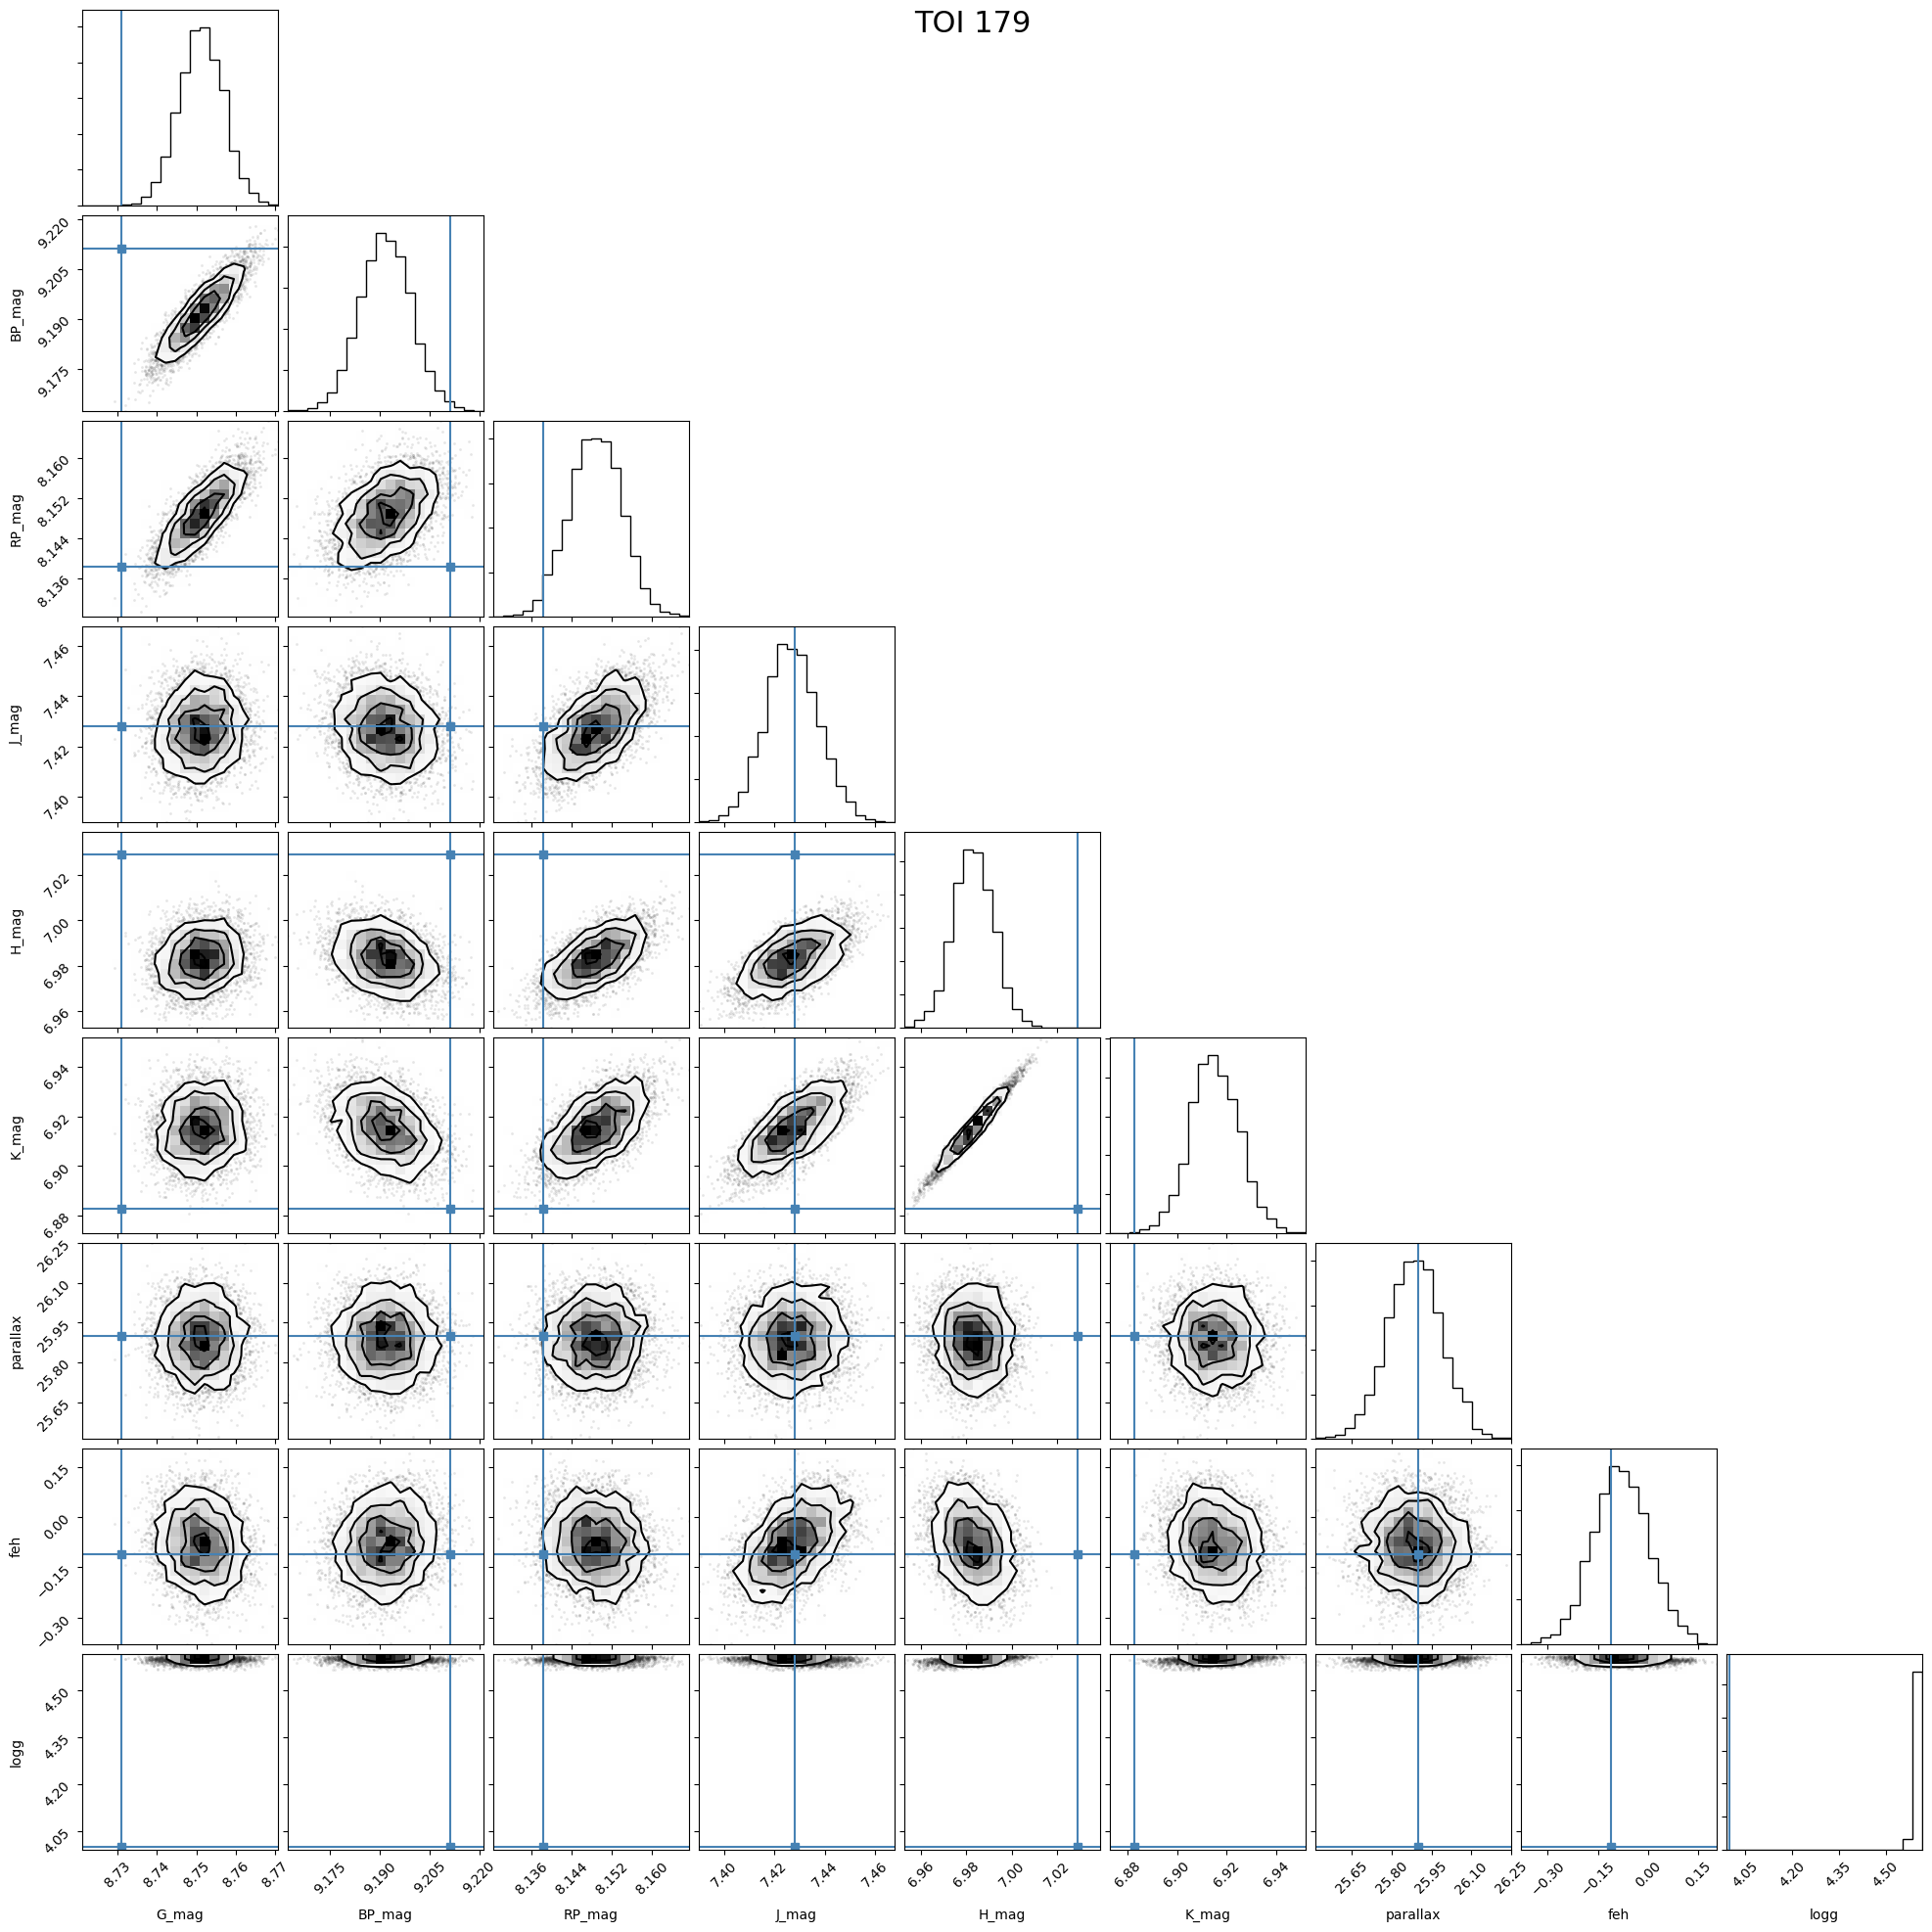

In [33]:
fig = s.plot_corner(posterior="observed")

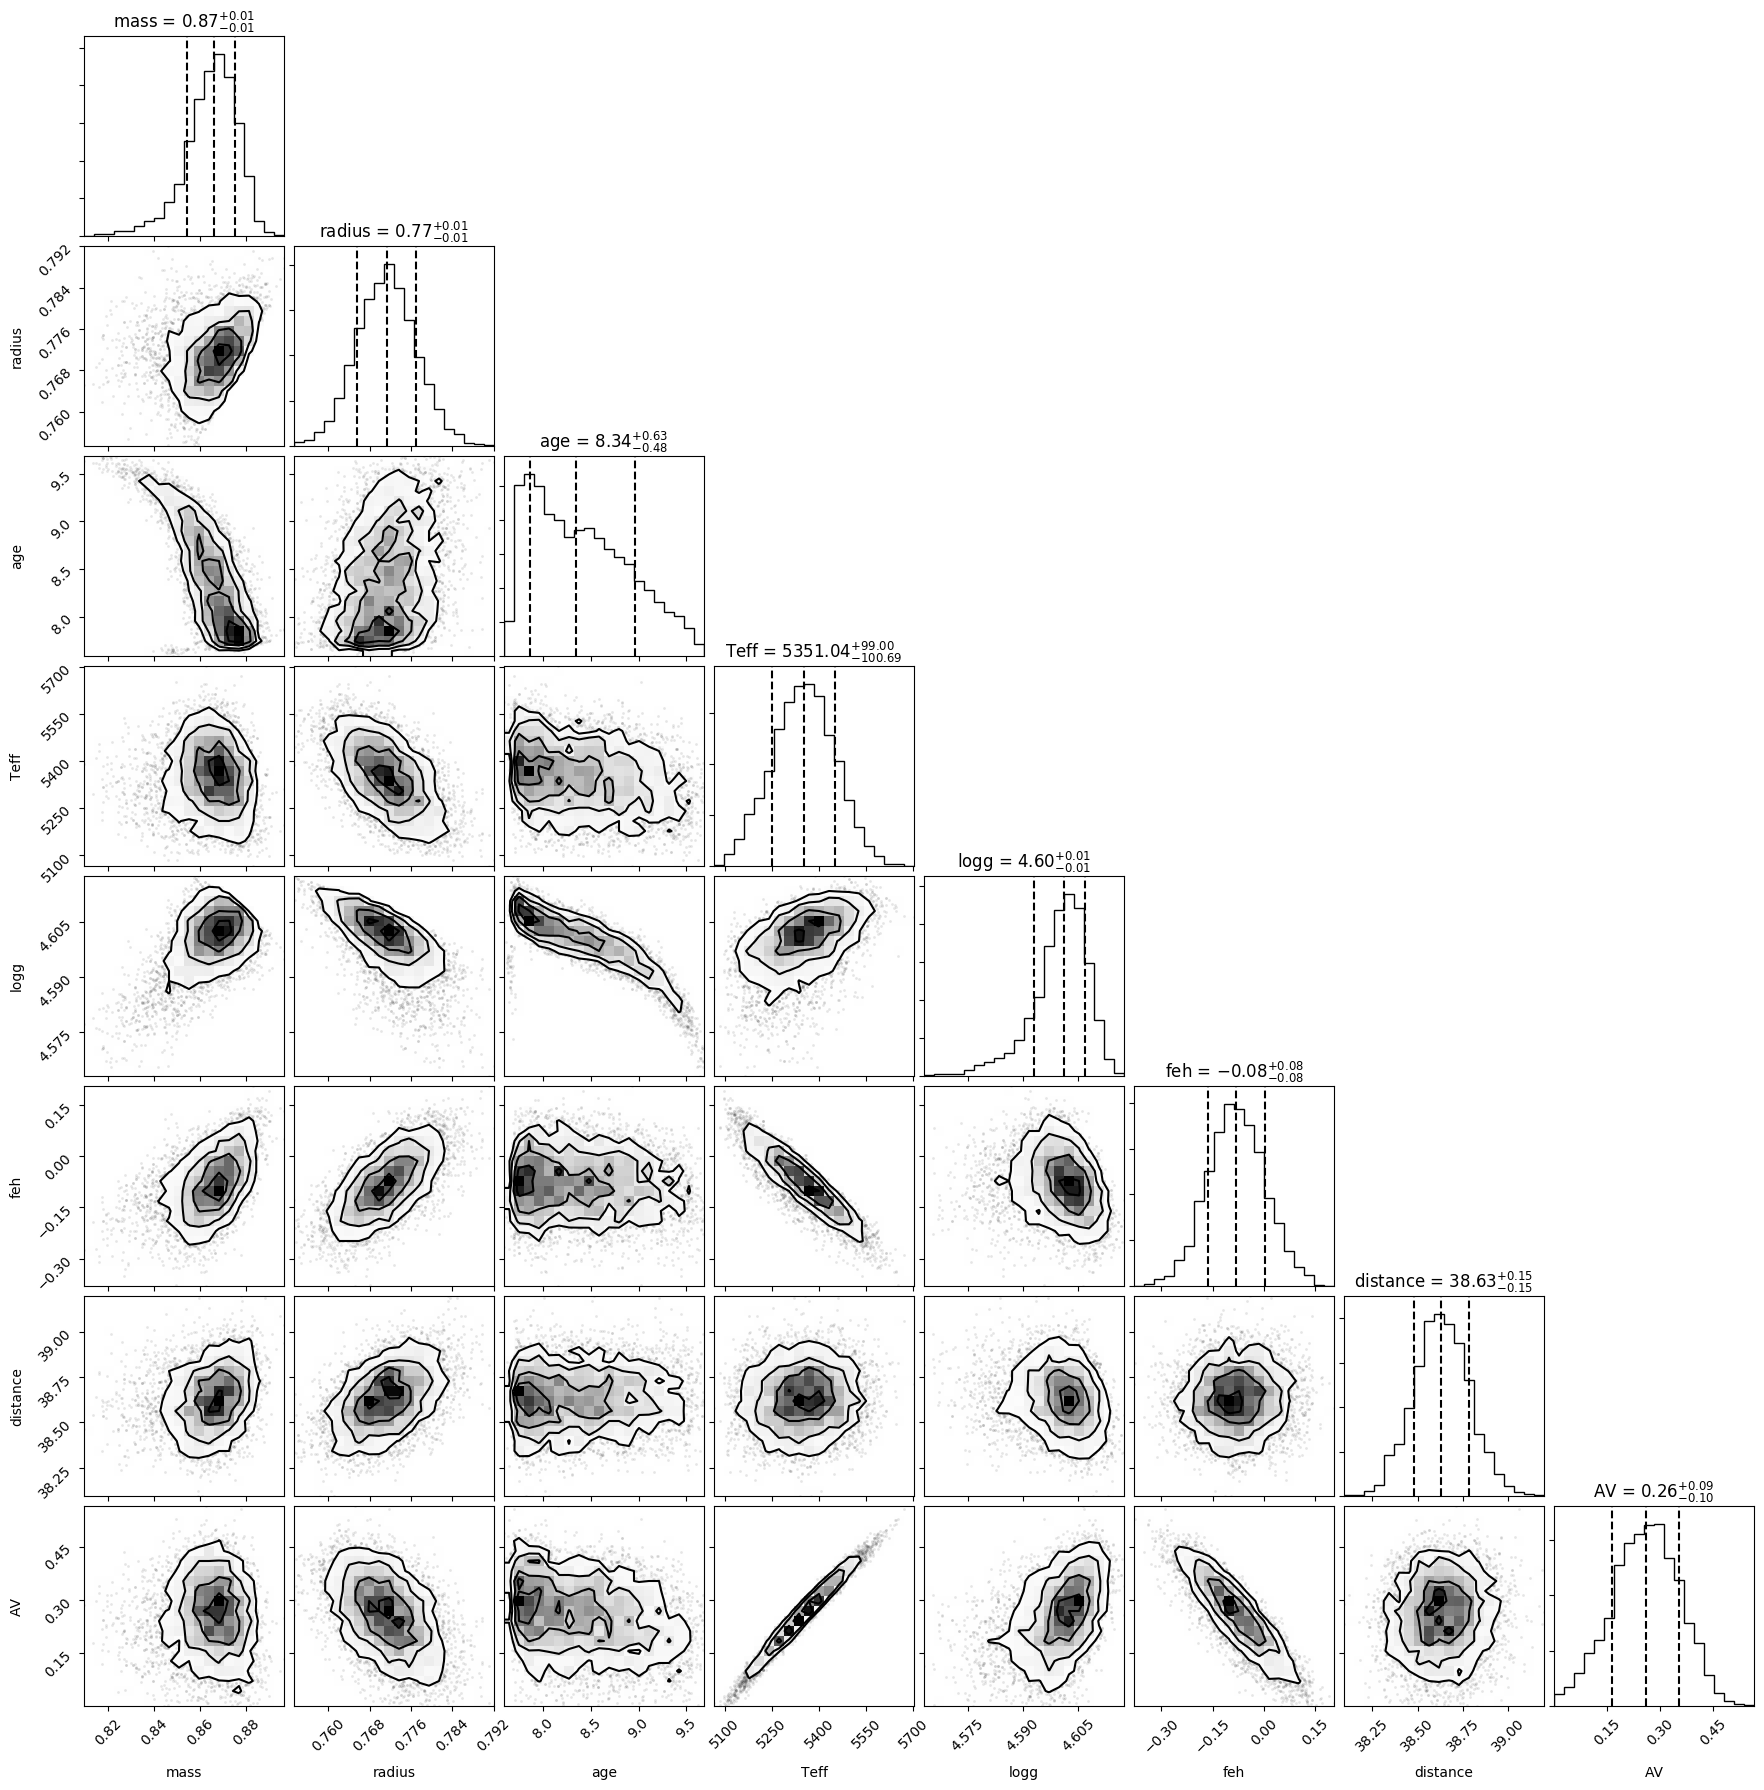

In [35]:
fig = s.plot_corner(posterior='physical')

### evolutionary stage

Based on Table II in [MIST README](http://waps.cfa.harvard.edu/MIST/README_tables.pdf), the star is 

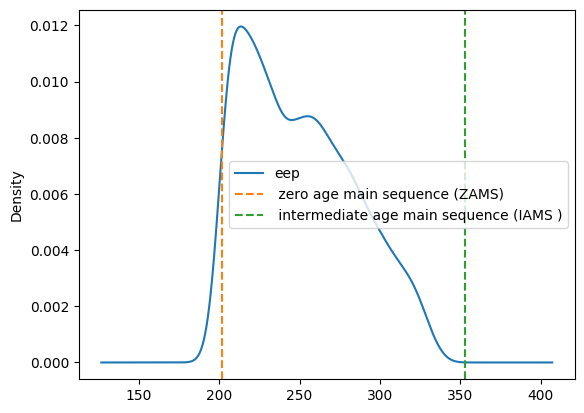

In [37]:
ax = s.plot_posterior_eep()

In [39]:
s.mist_eep_table

,Primary EEP,EEP Number,Phase,Comment
0,1,1,pre-main sequence (PMS),Medium Mass Type
1,2,202,zero age main sequence (ZAMS),Medium Mass Type
2,3,353,intermediate age main sequence (IAMS ),Medium Mass Type
3,4,454,terminal age main sequence (TAMS),Medium Mass Type
4,5,605,tip of the red giant branch (RGBTip),Medium Mass Type
5,6,631,zero age core helium burning (ZACHeB),Medium Mass Type
6,6,631,zero age horizontal branch (ZAHB),Low Mass Type
7,7,707,terminal age core helium burning (TACHeB),aka terminal age horizontal branch (TAHB)
8,8,808,thermally pulsating asymptotic giant branch (...,Low Mass Type
9,8,808,carbon burning (C-burn),High Mass Type


(0, 1000.0)

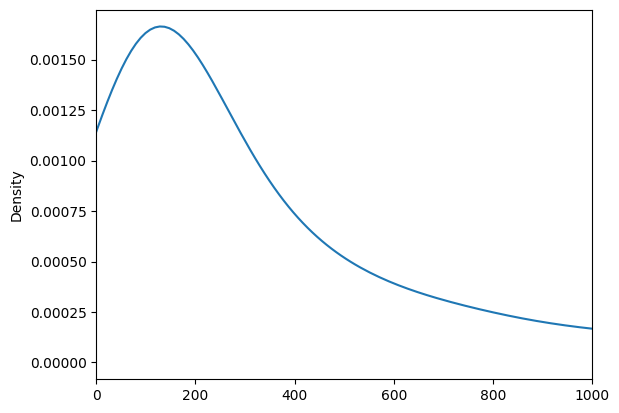

In [38]:
ax = s.isochrones_model.derived_samples.age.apply(lambda x: (10**x)/1e6).plot(kind='kde')
ax.set_xlim(0, 1e3)